
## PROJECT: The Android App Market on Google Play

### Load, clean, and visualize scraped Google Play Store data to gain insights into the Android app market.

### Project Description 

Aplikasi Mobile ada di mana-mana. Mereka mudah dibuat dan bisa menguntungkan. Karena dua faktor ini, semakin banyak aplikasi yang dikembangkan. 
Dalam proyek ini, kita akan melakukan analisis komprehensif pasar aplikasi Android dengan membandingkan lebih dari sepuluh ribu aplikasi di Google Play di berbagai kategori. Kita akan mencari insight dalam data untuk merancang strategi guna mendorong pertumbuhan dan retensi.

## 1. Load Data


In [14]:
# Read in dataset
import pandas as pd
apps_with_duplicates = pd.read_csv("datasets/apps.csv")

# Drop duplicates from apps_with_duplicates
apps = apps_with_duplicates.drop_duplicates()

# Print the total number of apps
print('Total number of apps in the dataset = ', apps.sum())

# Have a look at a random sample of 5 rows
print(apps.head(5))

Total number of apps in the dataset =  Unnamed: 0                                                 54729564
App               Photo Editor & Candy Camera & Grid & ScrapBook...
Category          ART_AND_DESIGNART_AND_DESIGNART_AND_DESIGNART_...
Rating                                                      34203.9
Reviews                                                  2092067574
Size                                                       171973.4
Installs          10,000+500,000+5,000,000+50,000,000+100,000+50...
Type              FreeFreeFreeFreeFreeFreeFreeFreeFreeFreeFreeFr...
Price             0000000000000000000000000000000000000000000000...
Content Rating    EveryoneEveryoneEveryoneTeenEveryoneEveryoneEv...
Genres            Art & DesignArt & Design;Pretend PlayArt & Des...
Last Updated      January 7, 2018January 15, 2018August 1, 2018J...
dtype: object
   Unnamed: 0                                                App  \
0           0     Photo Editor & Candy Camera & Grid & ScrapBoo

## 2. Data Cleaning

Dengan melihat sampel acak dari baris kumpulan data (dari tugas di atas), bahwa beberapa entri di kolom seperti Instals dan Price memiliki beberapa karakter khusus (+ , $</code>). 

Ini mencegah kolom menjadi murni numerik, sehingga sulit untuk menggunakannya dalam perhitungan matematis berikutnya. Idealnya, seperti namanya, kami ingin kolom ini hanya berisi angka dari [0-9].</p><p> 

Oleh karena itu, kita sekarang melanjutkan untuk membersihkan data kami. Secara khusus, karakter khusus <code>,</code> dan <code>+</code> yang ada di kolom <code>Installs</code> dan <code>$ yang ada di kolom Harga harus dihapus. 

In [15]:
# List of characters to remove
chars_to_remove = ['+', ',', '$']

# List of column names to clean
cols_to_clean = ['Installs', 'Price']

# Loop for each column in cols_to_clean
for col in cols_to_clean:
    # Loop for each char in chars_to_remove
    for char in chars_to_remove:
        # Replace the character with an empty string
        apps[col] = apps[col].apply(lambda x: x.replace(char, ''))  

# Print a summary of the apps dataframe
print(apps.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.1+ MB
None


## 3. Correcting Data Types

Dari hasil diatas bahwa Install dan Price dikategorikan sebagai tipe data objek (dan bukan int atau float) seperti yang kami inginkan. Ini karena kedua kolom ini awalnya memiliki tipe input campuran: digit dan karakter khusus.

Empat fitur yang paling sering kita kerjakan selanjutnya adalah Install, Size, Rating, dan Price. Jadi kita perlu menjadikannya menjadi numerik

In [16]:
import numpy as np

# Convert Installs to float data type
apps['Installs'] = apps['Installs'].astype(float)

# # Convert Price to float data type
apps['Price'] = apps['Price'].astype(float)


# Checking dtypes of the apps dataframe
print(apps.dtypes)

Unnamed: 0          int64
App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


# 4. Exploring app categories

Agar bisnis dapat menampilkan aplikasi mereka kepada pengguna, penting untuk membuatnya lebih cepat dan mudah ditemukan di Google Play. Untuk meningkatkan pengalaman pencarian secara keseluruhan, Google telah memperkenalkan konsep pengelompokan aplikasi ke dalam kategori.

Ini membawa kita ke pertanyaan-pertanyaan berikut:

1. Kategori mana yang memiliki pangsa aplikasi (aktif) tertinggi di pasar?
2. Apakah ada kategori tertentu yang mendominasi pasar?
3. Kategori mana yang memiliki jumlah aplikasi paling sedikit?


In [17]:
apps['Category'].unique()


array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [18]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Print the total number of unique categories
num_categories = len(apps['Category'].unique())
print('Number of categories = ', num_categories)

# Count the number of apps in each 'Category'. 
num_apps_in_category = apps['Category'].value_counts()

# Sort num_apps_in_category in descending order based on the count of apps in each category
sorted_num_apps_in_category = num_apps_in_category.sort_values(ascending = False)

data = [go.Bar(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
)]

plotly.offline.iplot(data)

Number of categories =  33


# 5. Distribution of app ratings

Setelah menyaksikan market share untuk setiap kategori aplikasi, mari kita lihat bagaimana kinerja rata-rata semua aplikasi ini. Peringkat aplikasi (dalam skala 1 hingga 5) memengaruhi kemampuan untuk ditemukan, konversi aplikasi, serta citra merek perusahaan secara keseluruhan. Peringkat adalah indikator kinerja utama dari sebuah aplikasi.

Dari penelitian ini, kita menemukan bahwa volume rata-rata peringkat di semua kategori aplikasi adalah 4,17. Plot histogram miring ke kiri menunjukkan bahwa sebagian besar aplikasi berperingkat tinggi dengan hanya beberapa pengecualian di aplikasi berperingkat rendah.

In [19]:
# Average rating of apps
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)

# Distribution of apps according to their ratings
data = [go.Histogram(
        x = apps['Rating']
)]

# Vertical dashed line to indicate the average app rating
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

Average app rating =  4.173243045387998


# 6. Size and Price of an App

Disini kita memeriksa Size dan Price Aplikasi. Untuk Size, jika size aplikasi mobile terlalu besar maka mungkin akan sulit atau malas bagi pengguna untuk mengunduhnya serta waktu pengunduhan yang lama juga menjadi salah satu faktor. Terlebih setiap perangkat pengguna mungkin memiliki ruang disk yang terbatas.

Sedangkan untuk harga, beberapa pengguna mengharapkan aplikasi yang digunakan gratis atau murah. Masalah2 ini bertambah jika negera berkembang adalah target pasar, terutama faktor kecepatan internet, penghasilan dan nilai tukar.

Bagaimana kita secara efektif menemukan strategi untuk mengukur dan memberi harga pada aplikasi kita ?

Ada beberapa pertanyaan yang harus kita cari tau jawabannya:
1. Apakah ukuran aplikasi memengaruhi peringkatnya?
2. Apakah pengguna bener2 peduli dengan aplikasi yang berat atau mereka lebih suka yang sebaliknya?
3. Apakah harga aplikasi memengaruhi peringkatnya ?
4. Apakah pengguna selalu lebih  memilih aplikasi gratis daripada aplikasi berbayar ?

Kita menemukan bahwa sebagian besar aplikasi berperingkat teratas berkisar dari 2MB hingga 20MB. 
Dan juga kami menemukan bahwa sebagian besar harga aplikasi teratas yang berbayar dibawah $10

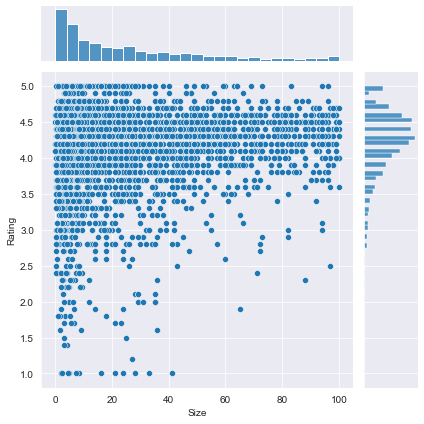

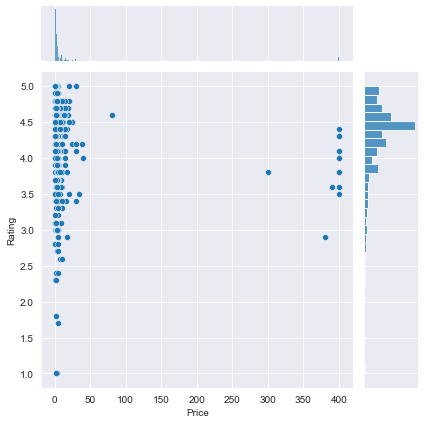

In [20]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

# Select rows where both 'Rating' and 'Size' values are present (ie. the two values are not null)
apps_with_size_and_rating_present = apps[(~apps['Rating'].isnull()) & (~apps['Size'].isnull())]

# Subset for categories with at least 250 apps
large_categories = apps_with_size_and_rating_present.groupby(['Category']).filter(lambda x: len(x) >= 250)

# Plot size vs. rating
plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'])

# Select apps whose 'Type' is 'Paid'
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present['Type'] == 'Paid']

# Plot price vs. rating
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])

# 7. Relation between app category and app price

Oke sekarang sampai pada bagian sulit, yaitu:

1. Bagaimana perusahaan dan pengembang harusnya memenuhi kebutuhan ?
2. Strategi monetasi apa yang dapat digunakan perusahaan untuk memaksimalkan keuntungan?

Biaya aplikasi sebagian besar didasarkan pada fitur, kompleksitas dan platform. Ada banyak faktor yang perlu dipertimbangkan kesedian pelanggan kita untuk membayar aplikasi kita. Harga yang salah dapat merusak kesepakatan bahkan sebelum pengunduhan terjadi. 

Calon pelanggan dapat dimatikan oleh apa ytang meraka anggap sebagai biaya mengejutkan atau mereka mungkin menghapus aplikasi yang telah mereka untuk setelah menerima banyak iklan.

Kategori yang berbeda menuntuk rentang harga yang berbeda, beberapa aplikasi yang sederhana dan digunakan setiap hari seperti aplikasi kalkulator, mungkin harus tetap gratis. Namun, masuk akal untuk mengenakan biaya untuk aplikasi medis yang sangat khusus untuk menndiagnosis pasien diabetes.

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


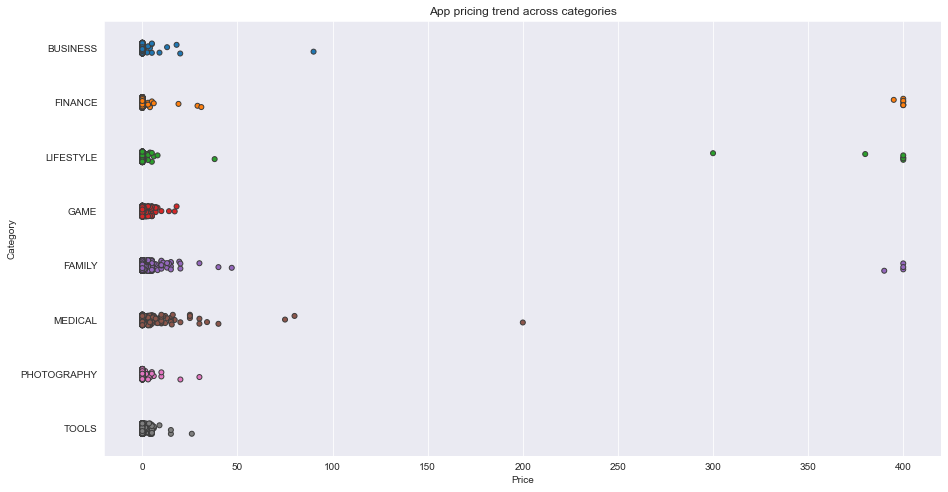

In [32]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Select a few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# Apps whose Price is greater than 200
apps_above_200 = apps[apps['Price'] > 200]
apps_above_200[['Category', 'App', 'Price']]

Kita melihat bahwa aplikasi Medis dan Keluarga adalah yang paling mahal. Beberapa aplikasi medis bahkan memperpanjang hingga $80! Semua aplikasi game dengan harga yang wajar di bawah $20. 

# 8. Filter out "junk" apps

Sepertinya banyak aplikasi yang sangat mahal adalah "junk apps". Artinya aplikasi yang tidak benar-benar memiliki tujuan. Beberapa pengembang aplikasi mungkin membuat aplikasi bernama I am Rich premium atau aplikasi paling mahal hanya untuk lelucon atau menguji keterampilan pengembangan aplikasi mereka. Beberapa pengembang bahkan melakukan ini dengan niat jahat dan mencoba menghasilkan uang dengan berharap orang-orang secara tidak sengaja mengklik pembelian aplikasi mereka di toko.

Mari kita filter aplikasi sampah dan  melakukan visualisasi kembali

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

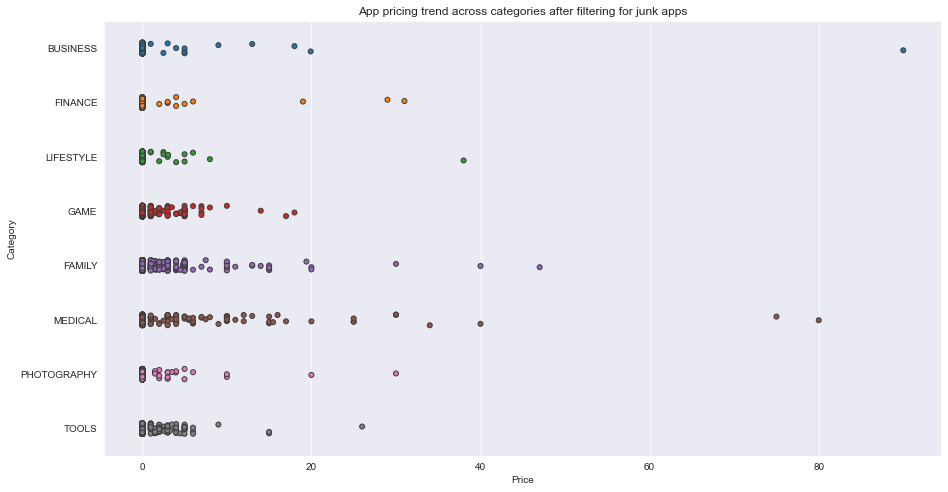

In [34]:
# Select apps priced below $100
apps_under_100 = popular_app_cats[popular_app_cats['Price'] < 100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine price vs category with the authentic apps (apps_under_100)
ax = sns.stripplot(x = 'Price', y = 'Category', data = apps_under_100, jitter = True, linewidth = 1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

#  9. Popularity of paid apps vs free apps

Untuk aplikasi di Play Store saat ini, ada 5 jenis strategi penetapan harga: Fre, Premium, Paymiun, Paid, and Subscription. Mari kita fokus pada aplikasi gratis dan berbayar saja.
Beberapa karakter aplikasi gratis adalah:
1. Free to download
2. Sumber income utama sering kali berasal dari iklan.
3. Seringkali dibuat oleh perushaan yang memiliki produk lain dan aplikasi difungsikan sebagai perpanjangan dari produk tersebut.
4. Dapat berfungsi sebagai alat untuk retensi pelanggan, komunikasi dan customer services.

Beberapa karakteristik aplikasi berbayar:
1. Pengguna diminta membayar sekali untuk mengunduh dan menggunakannya.
2. Pengguna tidak dapat bener2 merasakan aplikasi sebelum membelinya.

Apakah aplikasi bebrabyar di install sebanyak aplikasi gratis ?

Dari hasil plot dibawah ini, ternyata aplikasi beberbyar memiliki jumlah instal yang relatif lebih rendah dari aplikasi gratis, meskipun perbedaannya tidak terlalu mencolok seperti yang saya harapkan!

In [35]:
trace0 = go.Box(
    # Data for paid apps
    y = apps[apps['Type'] == 'Paid']['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps
    y = apps[apps['Type'] == 'Free']['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(title = "Log number of downloads",
                type = 'log',
                autorange = True)
)

# Add trace0 and trace1 to a list for plotting
data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

# 10. Sentiment analysis of user reviews

Untuk Data mining User Review untuk menentukan bagaimana perasaan orang tentang produk, merek, ata layanan. Kita dapat melakukannya dengan teknik alisis sentimen. User Review untuk aplikasi dapat dianalisis untuk mengidentifikasikan apakah suasa hati positif, negatif atau netral tentang aplikasi tersebut.

Misalnya, kata-kata positif dalam aplikasi tersebut mnyertakan kata-kata seperti 'Amazing', 'Friendly', 'Good', 'great', and 'love'. Sedangkan kata-kata negatif seperti 'malware', 'hate', 'problem', 'refund', and 'incompetent'

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

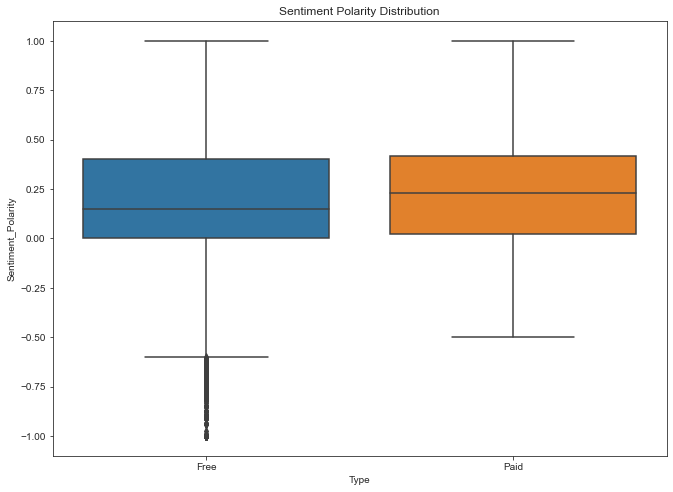

In [36]:
# Load user_reviews.csv
reviews_df = pd.read_csv('datasets/user_reviews.csv')

# Join the two dataframes
merged_df = pd.merge(apps, reviews_df, on = "App")

# Drop NA values from Sentiment and Review columns
merged_df = merged_df.dropna(subset = ['Sentiment', 'Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')

Dengan memplot skor polaritas sentimen dari ulasan pengguna untuk aplikasi berbayar dan gratis, saya mengamati bahwa aplikasi gratis menerima banyak komentar kasar, seperti yang ditunjukkan oleh outlier pada sumbu y negatif. Ulasan untuk aplikasi berbayar tampaknya tidak pernah terlalu negatif. Ini mungkin menunjukkan sesuatu tentang kualitas aplikasi, yaitu, aplikasi berbayar memiliki kualitas yang lebih tinggi daripada rata-rata aplikasi gratis. Skor polaritas median untuk aplikasi berbayar sedikit lebih tinggi daripada aplikasi gratis, sehingga disinkronkan dengan pengamatan kami sebelumnya.

Di notebook ini, saya menganalisis lebih dari sepuluh ribu aplikasi dari Google Play Store. saya dapat menggunakan temuan saya untuk menginformasikan keputusan saya jika ada kemungkinan lebih baik untuk ingin membuat aplikasi sendiri. 